In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/Users/vinay/OneDrive/Desktop/Christ/SEM2/MACHINE LEARNING/DATASETS/Airplane_Crashes_and_Fatalities_Since_1908.csv/Airplane_Crashes_and_Fatalities_Since_1908.csv")
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [4]:
df.shape

(5268, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [6]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [7]:
vals=[]
for col in df.columns:
    vals.append(len(df[col].unique()))
pd.DataFrame(data=vals,index=df.columns,columns=['Unique_Values'])

,Unique_Values
Date,4753
Time,1006
Location,4304
Operator,2477
Flight #,725
Route,3245
Type,2447
Registration,4906
cn/In,3708
Aboard,240


In [9]:
perc_na = pd.Series(round(df.isnull().sum()/len(df), 3), name='Percentage_of_NA')
num_na = pd.Series(df.isnull().sum(),name='Number_of_NA')
pd.concat([perc_na,num_na],axis=1)

,Percentage_of_NA,Number_of_NA
Date,0.000,0
Time,0.421,2219
Location,0.004,20
Operator,0.003,18
Flight #,0.797,4199
Route,0.324,1706
Type,0.005,27
Registration,0.064,335
cn/In,0.233,1228
Aboard,0.004,22


In [10]:
for i in df.Time.dropna():
    try:
        pd.to_datetime(i)
    except:
        print(i)

c: 1:00
c:17:00
c: 2:00
c:09:00
c16:50
12'20
18.40
c:09:00
114:20
c14:30
0943
22'08
c: 9:40


In [11]:
df.Time=df.Time.replace({"c: 1:00":'1:00', "c:17:00":'17:00', "c: 2:00":'2:00', "c:09:00":'09:00',
                         "c16:50":'16:50', "12'20":'12:20', "18.40":'18:40', "c:09:00":'09:00',
                         "114:20":'14:20', "c14:30":'14:30', "0943":'09:43', "22'08":'22:08', "c: 9:40":'9:40'})

In [12]:
# Converting Time variable from time to part of day type.
hour,mins='',''
def get_hours(time):
    if type(time) == float:
        return 'Unknown'
    
    hour, mins=[int(i) for i in time.split(':')]
    if mins > 30:
        hour+=1
    
    if hour <= 4:
        return'Late Night'
    if hour <= 8:
        return 'Early Morning'
    elif hour <= 12:
        return 'Morning'
    elif hour <= 16:
        return'Noon'
    elif hour <= 20:
        return 'Evening'
    else:
        return'Night'

In [13]:
df.Time=df.Time.apply(get_hours)

In [14]:
# Getting only the countries from the location variable.
loc=[]
def get_country(location):
    if type(location)==float:
        return "Unknown"
    
    loc=location.split(',')
    return loc[len(loc)-1].replace(" ",'').lower().replace("off ",'')

In [15]:
df.Location=df.Location.apply(get_country)

In [16]:
df.dropna(subset=['Operator'],inplace=True)

In [17]:
df.drop('Flight #',axis=1,inplace=True)

In [18]:
df.drop('Route',axis=1,inplace=True)

In [19]:
df[df.Type.isnull()==True]

,Date,Time,Location,Operator,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
49,04/06/1921,Unknown,australia,Military - Royal Australian Air Force,NaN,H3021,NaN,2.0,1.0,0.0,NaN
52,05/17/1921,Unknown,wyoming,US Aerial Mail Service,NaN,176,NaN,1.0,1.0,0.0,NaN
86,11/06/1924,Unknown,france,Grands Express Aeriens,NaN,F-AFBD,NaN,1.0,1.0,0.0,NaN
97,09/07/1925,Unknown,france,CIDNA,NaN,NaN,NaN,3.0,3.0,0.0,NaN
114,04/15/1927,Unknown,idaho,Varney Air Lines,NaN,NaN,NaN,1.0,1.0,0.0,Crashed after an unsuccessful attempt at fly i...
220,09/25/1930,Unknown,canada,Western Canada Airways,NaN,NaN,NaN,3.0,3.0,0.0,The air mail plane crashed in fog while en ro...
567,12/11/1941,Unknown,florida,Pan American Airways,NaN,NC21V,NaN,3.0,3.0,0.0,NaN
632,11/08/1943,Unknown,india,Military - Indian Air Force,NaN,NaN,NaN,1.0,1.0,37.0,Crashed into a village.
678,11/09/1944,Unknown,norway,Military - U.S. Army Air Corps,NaN,42-52196,NaN,NaN,NaN,NaN,NaN
717,06/29/1945,Unknown,india,Military - Royal Indian Air Force,NaN,NaN,NaN,2.0,2.0,36.0,Crashed into a village exploding and destoying...


In [20]:
df.dropna(subset=['Type'],inplace=True)



In [21]:
df.drop('Registration',axis=1,inplace=True)

In [22]:
df.drop('cn/In',axis=1,inplace=True)

In [23]:
df[df.Ground.isnull()==True]

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
26,10/20/1919,Unknown,englishchannel,Aircraft Transport and Travel,De Havilland DH-4,NaN,NaN,NaN,NaN
228,11/18/1930,Late Night,california,PacifiAir Transport,Boeing 40,3.0,3.0,NaN,Crashed into a mountainside at an altitude of ...
308,11/09/1933,Night,oregon,United Air Lines,Boeing 247,9.0,4.0,NaN,Crashed in a thickly wooded area upon taking o...
310,11/20/1933,Unknown,china,China National Aviation Corporation,Sinson,8.0,8.0,NaN,Crashed into the Chingshan mountain range in fog.
333,08/10/1934,Unknown,china,China National Aviation Corporation,Sikorsky S-38B,NaN,NaN,NaN,NaN
364,08/13/1935,Unknown,china,China National Aviation Corporation,Sikorsky S-38B,NaN,NaN,NaN,Destoryed in a storm.
423,12/26/1936,Unknown,china,China National Aviation Corporation,Douglas DC-2,NaN,NaN,NaN,NaN
527,11/20/1939,Unknown,england,British Airways,Airspeed Oxford,2.0,2.0,NaN,NaN
537,07/07/1940,Unknown,gulfoftonkin,Air France,Dewoitine D-338,NaN,NaN,NaN,Shot down by a Japanese military fighter.
570,01/24/1942,Unknown,borneo,KNILM,Douglas DC-3,NaN,NaN,NaN,Shot down by Japanese military aircraft.


In [24]:
df.Ground=df.Ground.fillna(df.Ground.median())

In [25]:
df[df.Aboard.isnull()==True]

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
26,10/20/1919,Unknown,englishchannel,Aircraft Transport and Travel,De Havilland DH-4,NaN,NaN,0.0,NaN
333,08/10/1934,Unknown,china,China National Aviation Corporation,Sikorsky S-38B,NaN,NaN,0.0,NaN
348,03/07/1935,Unknown,germany,Deruluft,Rochrbach Roland,NaN,3.0,0.0,Fuselage failure.
364,08/13/1935,Unknown,china,China National Aviation Corporation,Sikorsky S-38B,NaN,NaN,0.0,Destoryed in a storm.
423,12/26/1936,Unknown,china,China National Aviation Corporation,Douglas DC-2,NaN,NaN,0.0,NaN
526,09/26/1939,Unknown,northsea,KLM Royal Dutch Airlines,Douglas DC-3,NaN,1.0,0.0,One Swedish passenger was killed when the plan...
537,07/07/1940,Unknown,gulfoftonkin,Air France,Dewoitine D-338,NaN,NaN,0.0,Shot down by a Japanese military fighter.
570,01/24/1942,Unknown,borneo,KNILM,Douglas DC-3,NaN,NaN,0.0,Shot down by Japanese military aircraft.
571,01/26/1942,Unknown,timor,KNILM,Grumman G-21 Goose,NaN,NaN,0.0,Shot down by Japanese military aircraft.
573,02/14/1942,Unknown,Unknown,China National Aviation Corporation,Douglas DC-2,NaN,NaN,0.0,NaN


In [26]:
# Dropping rows where any aboard and fatalities are having NAN values 
# because they dont have any value to our purpose.
df.dropna(subset=['Aboard','Fatalities'],how='any',inplace=True)

In [27]:
df.dropna(subset=["Summary"],inplace=True)

In [28]:
df.shape

(4835, 9)

In [29]:
# Returns only year.
def get_year(date):
    return date.split('/')[2]

In [30]:
df.Date=df.Date.apply(get_year)

In [31]:
df.Date=df.Date.astype(int)

In [32]:
df

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
0,1908,Evening,virginia,Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912,Early Morning,newjersey,Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913,Unknown,canada,Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913,Evening,overthenorthsea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913,Morning,germany,Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...
5263,2009,Early Morning,indonesia,Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,2009,Unknown,democratirepublicongo,Service Air,Antonov An-26,4.0,4.0,0.0,The cargo plane crashed while on approach to I...
5265,2009,Late Night,brazil,Air France,Airbus A330-203,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,2009,Early Morning,canada,Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 5267
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4835 non-null   int32  
 1   Time        4835 non-null   object 
 2   Location    4835 non-null   object 
 3   Operator    4835 non-null   object 
 4   Type        4835 non-null   object 
 5   Aboard      4835 non-null   float64
 6   Fatalities  4835 non-null   float64
 7   Ground      4835 non-null   float64
 8   Summary     4835 non-null   object 
dtypes: float64(3), int32(1), object(5)
memory usage: 358.8+ KB


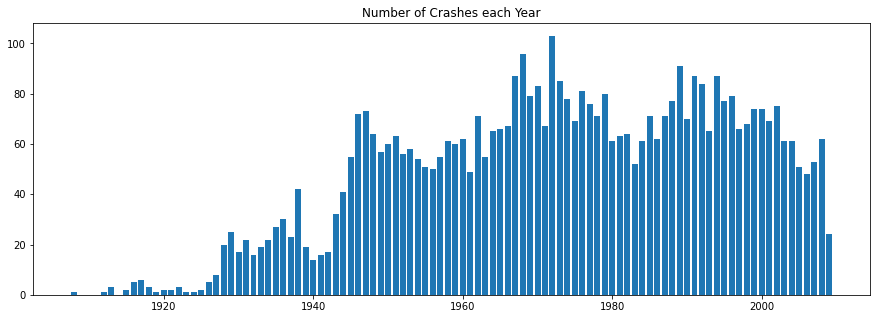

In [34]:
crshs=pd.DataFrame(df.Date.value_counts())

plt.figure(figsize=(15, 5))
plt.bar(x=crshs.index, height=crshs["Date"])
plt.title("Number of Crashes each Year")
plt.show()

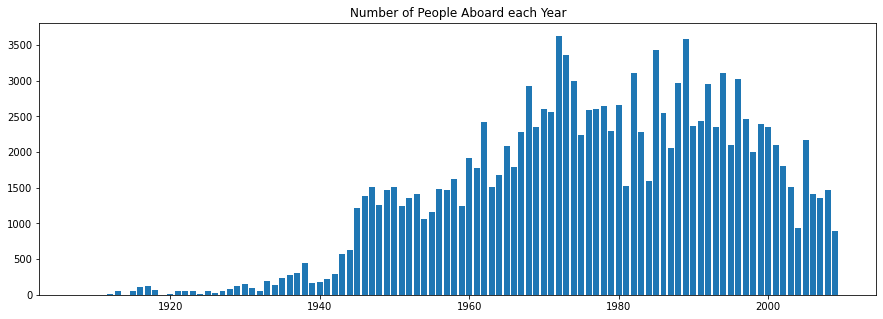

In [35]:
abor=pd.DataFrame(df.Aboard.groupby(df.Date).sum())

plt.figure(figsize=(15, 5))
plt.bar(x=abor.index, height=abor["Aboard"])
plt.title("Number of People Aboard each Year")
plt.show()

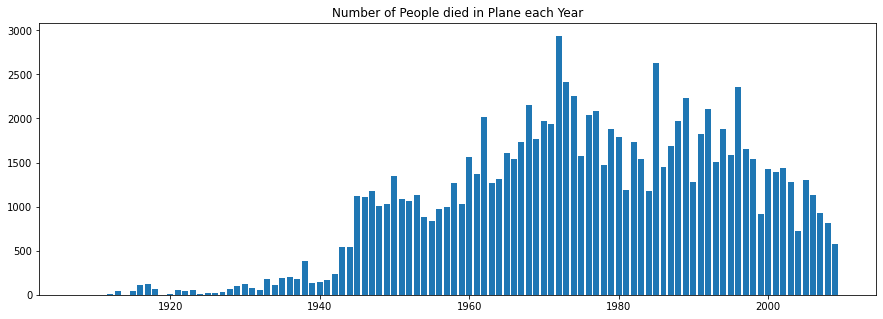

In [36]:
fatals=pd.DataFrame(df.Fatalities.groupby(df.Date).sum())

plt.figure(figsize=(15, 5))
plt.bar(x=fatals.index, height=fatals["Fatalities"])
plt.title("Number of People died in Plane each Year")
plt.show()

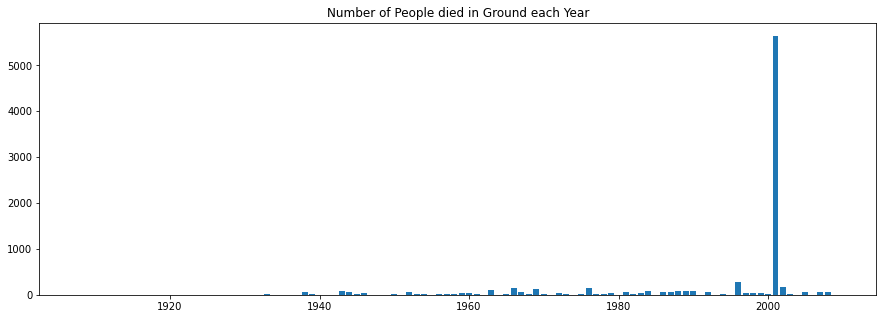

In [37]:
grd=pd.DataFrame(df.Ground.groupby(df.Date).sum())

plt.figure(figsize=(15, 5))
plt.bar(x=grd.index, height=grd["Ground"])
plt.title("Number of People died in Ground each Year")
plt.show()

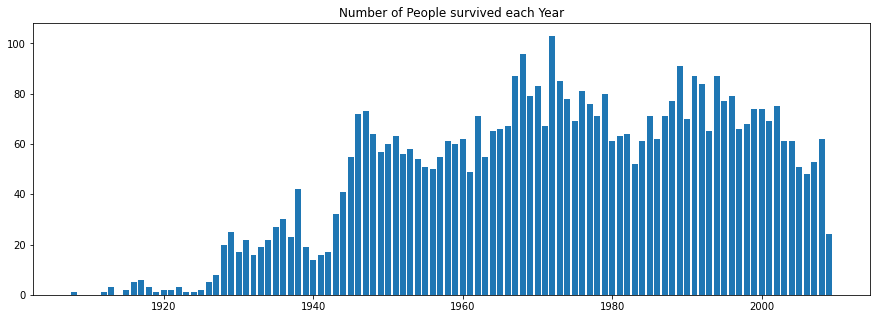

In [38]:
sur=pd.DataFrame({"Survived":df.Aboard-df.Fatalities},index=df.Date).index.value_counts()

plt.figure(figsize=(15, 5))
plt.bar(x=sur.index, height=sur.values)
plt.title("Number of People survived each Year")
plt.show()

In [39]:
# Top 7 Plane Operators which involved in crashes.
pd.DataFrame(df.Operator.value_counts().sort_values(ascending=False)[:10])

,Operator
Military - U.S. Air Force,170
Aeroflot,163
Air France,60
Deutsche Lufthansa,51
Air Taxi,44
United Air Lines,44
Military - U.S. Army Air Forces,43
Pan American World Airways,40
American Airlines,36
Military - U.S. Navy,35


In [40]:
#Top 10 Plane Types which involved in crashes.
pd.DataFrame(df.Type.value_counts().sort_values(ascending=False))[:10]

,Type
Douglas DC-3,318
de Havilland Canada DHC-6 Twin Otter 300,79
Douglas C-47A,69
Douglas C-47,57
Douglas DC-4,39
Yakovlev YAK-40,36
Antonov AN-26,34
Douglas DC-6B,26
Douglas C-47B,26
Junkers JU-52/3m,25


In [41]:
# Top 10 Countries which had most Plane crashes.
pd.DataFrame(df.Location.value_counts().sort_values(ascending=False))[:10]

,Location
alaska,175
brazil,173
russia,162
colombia,140
california,140
canada,138
france,108
india,92
england,90
indonesia,80


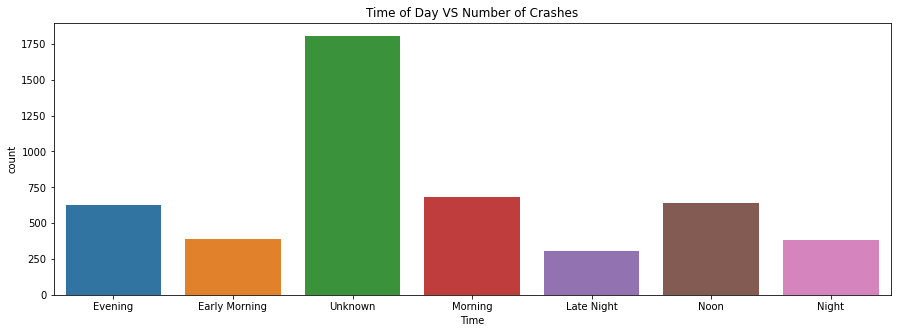

In [42]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df.Time)
plt.title("Time of Day VS Number of Crashes")
plt.show()

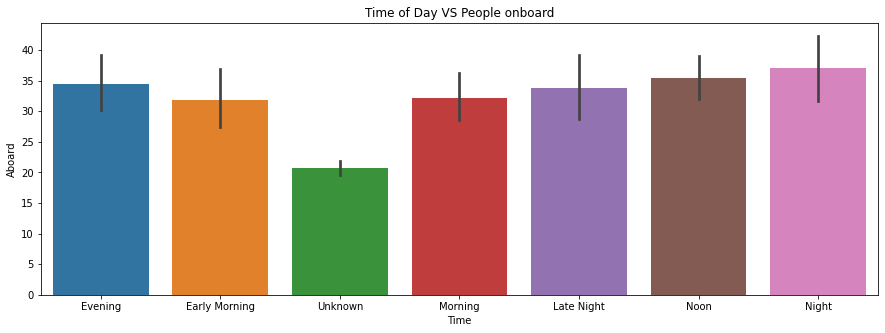

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x=df.Time, y=df.Aboard)
plt.title("Time of Day VS People onboard")
plt.show()

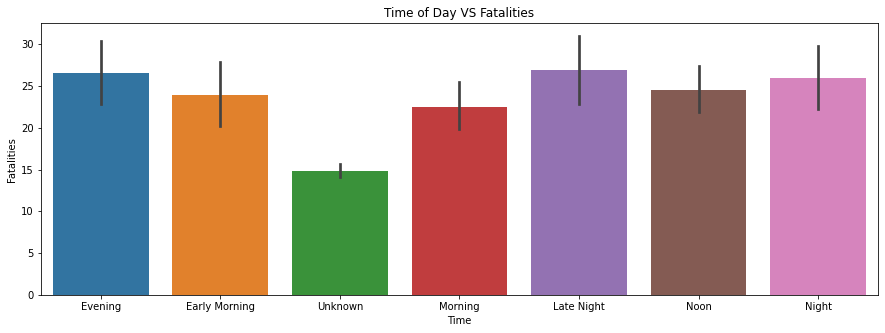

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x=df.Time, y=df.Fatalities)
plt.title("Time of Day VS Fatalities")
plt.show()

In [45]:
df['Time_Of_Day']=df.Time.replace({"Unknown":0, "Late Night":1, "Early Morning":2, "Morning":3,"Noon":4, "Evening":5, "Night":6})
df_quant=[col for col in df.columns if df[col].dtype != object]
df_quant=df[df_quant]
df_quant.head(2)



,Date,Aboard,Fatalities,Ground,Time_Of_Day
0,1908,2.0,1.0,0.0,5
1,1912,5.0,5.0,0.0,2


In [46]:
from sklearn.preprocessing import StandardScaler
def data_scaling(dataframe,inverse=False):
    scaler=StandardScaler()
    if inverse == False:
        return scaler.fit_transform(dataframe)
    else:
        scaler.fit(dataframe)
        return scaler.inverse_transform(dataframe)

In [47]:
df_quant_scaled=data_scaling(df_quant)

In [48]:
df

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Time_Of_Day
0,1908,Evening,virginia,Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",5
1,1912,Early Morning,newjersey,Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,2
2,1913,Unknown,canada,Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0
3,1913,Evening,overthenorthsea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,5
4,1913,Morning,germany,Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,3
...,...,...,...,...,...,...,...,...,...,...
5263,2009,Early Morning,indonesia,Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,2.0,"While on approach, the military transport cras...",2
5264,2009,Unknown,democratirepublicongo,Service Air,Antonov An-26,4.0,4.0,0.0,The cargo plane crashed while on approach to I...,0
5265,2009,Late Night,brazil,Air France,Airbus A330-203,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,1
5266,2009,Early Morning,canada,Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2


In [49]:
from sklearn.cluster import KMeans

# Obtain optimal number of clusters
scores_1 = []

range_values = range(1, 10)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_quant_scaled)
  scores_1.append(kmeans.inertia_)

In [50]:
# Build the KMeans model
kmeans = KMeans(3)
kmeans.fit(df_quant_scaled)

KMeans(n_clusters=3)

In [51]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_quant.columns])
cluster_centers


,Date,Aboard,Fatalities,Ground,Time_Of_Day
0,-0.045723,-0.237314,-0.222626,-0.021371,-0.049634
1,0.468069,2.456098,2.301147,-0.008375,0.513267
2,1.309412,1.118909,1.674215,48.880965,0.324189


In [52]:
cluster_centers = data_scaling(cluster_centers,inverse=True)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_quant.columns])
cluster_centers

,Date,Aboard,Fatalities,Ground,Time_Of_Day
0,0.551712,0.851616,1.012051,15.791148,0.250998
1,0.838713,3.813264,3.719867,16.090706,0.382656
2,1.308680,2.342905,3.047217,1142.976289,0.338433


In [53]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':kmeans.labels_})], axis = 1)
df_cluster.head()

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Time_Of_Day,cluster
0,1908.0,Evening,virginia,Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",5.0,0.0
1,1912.0,Early Morning,newjersey,Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,2.0,0.0
2,1913.0,Unknown,canada,Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,0.0
3,1913.0,Evening,overthenorthsea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,5.0,0.0
4,1913.0,Morning,germany,Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,3.0,0.0


In [54]:
pd.crosstab(index=df_cluster['cluster'],columns='count')

col_0,count
cluster,
0.0,4408
1.0,425
2.0,2


In [55]:
df

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Time_Of_Day
0,1908,Evening,virginia,Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",5
1,1912,Early Morning,newjersey,Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,2
2,1913,Unknown,canada,Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0
3,1913,Evening,overthenorthsea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,5
4,1913,Morning,germany,Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,3
...,...,...,...,...,...,...,...,...,...,...
5263,2009,Early Morning,indonesia,Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,2.0,"While on approach, the military transport cras...",2
5264,2009,Unknown,democratirepublicongo,Service Air,Antonov An-26,4.0,4.0,0.0,The cargo plane crashed while on approach to I...,0
5265,2009,Late Night,brazil,Air France,Airbus A330-203,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,1
5266,2009,Early Morning,canada,Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_quant_scaled)
principal_comp

array([[-1.16366746,  1.01927306],
       [-1.36655202,  1.82645246],
       [-1.73808436,  2.33588731],
       ...,
       [ 7.19127195,  1.86396468],
       [-0.46701269, -1.3587852 ],
       [-0.30080281, -0.61079955]])

In [57]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.163667,1.019273
1,-1.366552,1.826452
2,-1.738084,2.335887
3,-0.589273,1.050873
4,-0.376388,1.819753


In [58]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':kmeans.labels_})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.163667,1.019273,0
1,-1.366552,1.826452,0
2,-1.738084,2.335887,0
3,-0.589273,1.050873,0
4,-0.376388,1.819753,0


In [59]:
pca.explained_variance_ratio_

array([0.36900472, 0.22799941])